<a href="https://colab.research.google.com/github/ankit-rathi/Tradevesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/tradevesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Mounted at /content/drive


Run date time (IST): 2024-11-01 08:34:52
-------------------
qualified stocks: 87
with latest results: 83
still star stocks: 41
-------------------
Initial Investment:  98.12 L
CY Investment:  1.11 C
Reserve:  400.00
Current:  1.19 C
-------------------
Today PnL: 17.09 K (0.14%)
Current PnL: -1.36 L (-1.22%)
CY Booked + Current PnL: 7.03 L (6.32%)
-------------------
Total profit:  8.16 L
Total loss:  -9.51 L
-------------------
Total Booked + Current PnL: 20.14 L (20.53%)
Total Booked PnL: 21.50 L (21.91%)
Curr Year Booked PnL: 8.39 L (7.08%)
Prev Year Booked PnL: 13.11 L (13.36%)
Est FTT:  1.89 C
Est FTT PnL: 70.01 L (59.06%)
-------------------
Est LTT:  2.37 C
Est LTT PnL: 1.19 C (100.19%)
Deployed:  98.12 L
Current:  1.19 C
CAGR/XIRR %: 18.76%


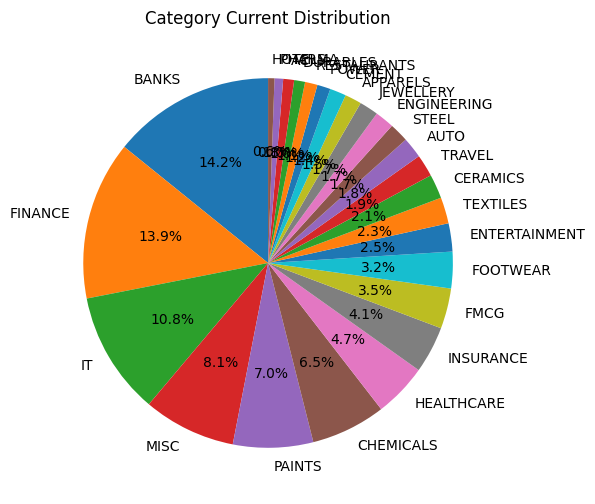

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2()
cols = ['Symbol', 'AvgCost', 'Close', 'FTT', 'Dev%_PE', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'Category']
df_portfolio_features = df_portfolio_features[cols]

In [4]:
# all portfolio
df_portfolio_features = df_portfolio_features.sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(df_portfolio_features, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
31,HCLTECH,1349.00,1766.05,2006.00,40.59,86.21,132454.0,31279.0,18000.0,-3.96,30.92,13.59,48.70,86.0,1.74,1.12,45.71,X40,BTT,IT
47,LALPATHLAB,2519.90,3113.00,3689.00,-3.79,60.92,112068.0,21352.0,20733.0,2.25,23.54,18.50,46.39,32.0,1.03,0.95,55.41,X40N,NTT,HEALTHCARE
76,TCS,4073.44,3968.45,4998.00,0.75,52.87,95243.0,-2520.0,24706.0,-2.84,-2.58,25.94,22.70,10.0,-0.10,0.80,20.83,X40,BTT,IT
49,LTIM,5051.49,5710.85,7262.39,15.55,41.38,91374.0,10550.0,24826.0,-1.45,13.05,27.17,43.77,10.0,0.42,0.77,25.85,X200,ATH,IT
86,WIPRO,401.00,551.80,611.00,29.97,96.55,232308.0,63487.0,24927.0,-2.38,37.61,10.73,52.37,29.0,2.55,1.96,45.79,XR,NTT,IT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,CAMPUS,294.86,295.00,631.85,13.44,17.24,167855.0,80.0,191674.0,2.57,0.05,114.19,114.29,1.0,0.00,1.42,37.53,XSP,ATH,FOOTWEAR
62,SAIL,130.64,115.75,228.00,49.27,3.45,199322.0,-25640.0,193302.0,-0.24,-11.40,96.98,74.53,20.0,-0.13,1.68,38.47,XSP,BTT,STEEL
11,BANDHANBNK,223.20,182.21,400.00,-36.24,40.23,178019.0,-40047.0,212786.0,2.62,-18.36,119.53,79.21,-19.0,-0.19,1.50,8.32,XSP,NTT,BANKS
74,TANLA,991.56,752.20,2007.31,-37.03,9.20,166236.0,-52899.0,277381.0,0.43,-24.14,166.86,102.44,-29.0,-0.19,1.40,3.17,AR,ATH,IT


In [5]:
# lower current allocation with minimal upside
tmp_df = df_portfolio_features[(df_portfolio_features['CurrAlloc%'] < 1) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
47,LALPATHLAB,2519.90,3113.00,3689.00,-3.79,60.92,112068.0,21352.0,20733.0,2.25,23.54,18.50,46.39,32.0,1.03,0.95,55.41,X40N,NTT,HEALTHCARE
76,TCS,4073.44,3968.45,4998.00,0.75,52.87,95243.0,-2520.0,24706.0,-2.84,-2.58,25.94,22.70,10.0,-0.10,0.80,20.83,X40,BTT,IT
49,LTIM,5051.49,5710.85,7262.39,15.55,41.38,91374.0,10550.0,24826.0,-1.45,13.05,27.17,43.77,10.0,0.42,0.77,25.85,X200,ATH,IT
15,BAYERCROP,4346.57,6625.85,8325.00,27.75,97.70,106014.0,36469.0,27182.0,4.03,52.44,25.64,91.53,36.0,1.34,0.89,38.37,X40N,BTT,CHEMICALS
22,DABUR,523.35,540.00,735.00,-8.22,16.09,94500.0,2914.0,34124.0,-1.22,3.18,36.11,40.44,3.0,0.09,0.80,9.51,X40,BTT,FMCG
82,UNIONBANK,124.65,117.17,163.00,-9.22,73.56,94205.0,-6014.0,36844.0,0.42,-6.00,39.11,30.77,-41.0,-0.16,0.79,15.80,XSP,NTT,BANKS
80,TTKPRESTIG,769.29,863.90,1149.24,24.97,85.06,113171.0,12394.0,37380.0,-1.16,12.30,33.03,49.39,17.0,0.33,0.95,29.99,X40N,ATH,DURABLES
7,ATULAUTO,656.09,607.10,844.00,NaN,69.54,95922.0,-7740.0,37429.0,3.37,-7.47,39.02,28.64,-48.0,-0.21,0.81,27.62,XSP,NTT,AUTO
25,FINEORG,4771.46,4864.35,7168.71,-3.14,50.57,82694.0,1579.0,39172.0,2.01,1.95,47.37,50.24,2.0,0.04,0.70,20.78,X40N,ATH,CHEMICALS
37,INDUSINDBK,1354.50,1055.60,1800.00,-40.64,1.15,60169.0,-17038.0,42431.0,-0.08,-22.07,70.52,32.89,-17.0,-0.40,0.51,1.68,XR,NTT,BANKS


In [6]:
# XSP allocation
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'] == 'XSP') ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
41,JIOFIN,320.24,322.30,387.00,-7.32,43.68,159216.0,1017.0,31955.0,-1.20,0.64,20.07,20.85,94.0,0.03,1.34,50.50,XSP,BTT,FINANCE
82,UNIONBANK,124.65,117.17,163.00,-9.22,73.56,94205.0,-6014.0,36844.0,0.42,-6.00,39.11,30.77,-41.0,-0.16,0.79,15.80,XSP,NTT,BANKS
7,ATULAUTO,656.09,607.10,844.00,NaN,69.54,95922.0,-7740.0,37429.0,3.37,-7.47,39.02,28.64,-48.0,-0.21,0.81,27.62,XSP,NTT,AUTO
16,BERGEPAINT,558.54,536.80,680.00,-29.18,14.94,170166.0,-6891.0,45400.0,-1.85,-3.89,26.68,21.75,-6.0,-0.15,1.44,18.55,XSP,NTT,PAINTS
56,QUESS,716.17,723.00,986.00,-13.59,54.60,126525.0,1195.0,46030.0,3.36,0.95,36.38,37.68,5.0,0.03,1.07,74.52,XSP,NTT,MISC
45,KANSAINER,299.63,285.10,340.00,-39.05,47.13,256590.0,-13077.0,49419.0,-0.18,-4.85,19.26,13.47,-12.0,-0.26,2.16,11.21,XSP,NTT,PAINTS
68,SHALBY,271.92,236.20,327.00,NaN,10.34,130619.0,-19753.0,50210.0,-2.92,-13.14,38.44,20.26,-34.0,-0.39,1.10,9.90,XSP,NTT,HEALTHCARE
78,TITAGARH,1117.46,1221.65,1548.00,18.13,89.66,199129.0,16983.0,53187.0,2.69,9.32,26.71,38.53,513.0,0.32,1.68,61.32,XSP,NTT,ENGINEERING
52,MEDANTA,1022.60,1106.10,1486.00,-1.75,98.85,168127.0,12692.0,57752.0,2.15,8.17,34.35,45.32,151.0,0.22,1.42,37.19,XSP,NTT,HEALTHCARE
43,JPPOWER,18.73,18.20,26.20,-62.92,88.51,137829.0,-4013.0,60590.0,-1.25,-2.83,43.96,39.88,123.0,-0.07,1.16,75.00,XSP,NTT,POWER


In [7]:
# XSP for average up
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'] == 'XSP') ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
41,JIOFIN,320.24,322.30,387.00,-7.32,43.68,159216.0,1017.0,31955.0,-1.20,0.64,20.07,20.85,94.0,0.03,1.34,50.50,XSP,BTT,FINANCE
82,UNIONBANK,124.65,117.17,163.00,-9.22,73.56,94205.0,-6014.0,36844.0,0.42,-6.00,39.11,30.77,-41.0,-0.16,0.79,15.80,XSP,NTT,BANKS
7,ATULAUTO,656.09,607.10,844.00,NaN,69.54,95922.0,-7740.0,37429.0,3.37,-7.47,39.02,28.64,-48.0,-0.21,0.81,27.62,XSP,NTT,AUTO
16,BERGEPAINT,558.54,536.80,680.00,-29.18,14.94,170166.0,-6891.0,45400.0,-1.85,-3.89,26.68,21.75,-6.0,-0.15,1.44,18.55,XSP,NTT,PAINTS
56,QUESS,716.17,723.00,986.00,-13.59,54.60,126525.0,1195.0,46030.0,3.36,0.95,36.38,37.68,5.0,0.03,1.07,74.52,XSP,NTT,MISC
45,KANSAINER,299.63,285.10,340.00,-39.05,47.13,256590.0,-13077.0,49419.0,-0.18,-4.85,19.26,13.47,-12.0,-0.26,2.16,11.21,XSP,NTT,PAINTS
68,SHALBY,271.92,236.20,327.00,NaN,10.34,130619.0,-19753.0,50210.0,-2.92,-13.14,38.44,20.26,-34.0,-0.39,1.10,9.90,XSP,NTT,HEALTHCARE
78,TITAGARH,1117.46,1221.65,1548.00,18.13,89.66,199129.0,16983.0,53187.0,2.69,9.32,26.71,38.53,513.0,0.32,1.68,61.32,XSP,NTT,ENGINEERING
52,MEDANTA,1022.60,1106.10,1486.00,-1.75,98.85,168127.0,12692.0,57752.0,2.15,8.17,34.35,45.32,151.0,0.22,1.42,37.19,XSP,NTT,HEALTHCARE
43,JPPOWER,18.73,18.20,26.20,-62.92,88.51,137829.0,-4013.0,60590.0,-1.25,-2.83,43.96,39.88,123.0,-0.07,1.16,75.00,XSP,NTT,POWER


In [8]:
# Top N allocation
df_tmp = df_portfolio_features.sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.76
1,20,35.12
2,30,49.26


In [9]:
# criteria-wise allocation
df_portfolio_features.groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XSP,35.92
X40,21.18
XR,18.80
X40N,16.08
AR,5.62
SR,1.61
X200,0.77
